Andry Rakotonjanabelo
 - No Colaborators

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [29]:
'''your code here. add cells as needed'''
X = mushrooms_df.drop('type', axis=1)
y = mushrooms_df['type']

#deciding ordinal and categorical columns
# categorical columns: cap_shape, cap_surface, cap_color, odor, gill_attachment, gill_color, stalk_root, 
#       stalk_surface_above_ring, stalk_surface_below_ring, veil_color, ring_type, spore_print_color, population, habitat

# ordinal columns: bruises (binary), gill_spacing (binary), gill_size (binary), stalk_shape, veil_type (binary), ring_number

ordinal_cols = ['bruises', 'gill_attachment', 'gill_spacing', 'gill_size', 'stalk_shape', 'veil_type', 'ring_number', 'population']
categorical_cols = [col for col in X.columns if col not in ordinal_cols]


# ordinal encoding
ord_categories = [['f','t'], ['f', 'a'], ['c', 'w'], ['n', 'b'], ['t', 'e'], ['p'], ['n', 'o', 't'], ['y', 's', 'v', 'n', 'c', 'a']]
ordinal_encoder = OrdinalEncoder(categories=ord_categories)

# categorical encoding
categorical_encoder = OneHotEncoder()

# column transformer
col_transformer = ColumnTransformer(
    transformers=[
        ('ord', ordinal_encoder, ordinal_cols), 
        ('cat', categorical_encoder, categorical_cols)
        ]
    )


X_transformed = col_transformer.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

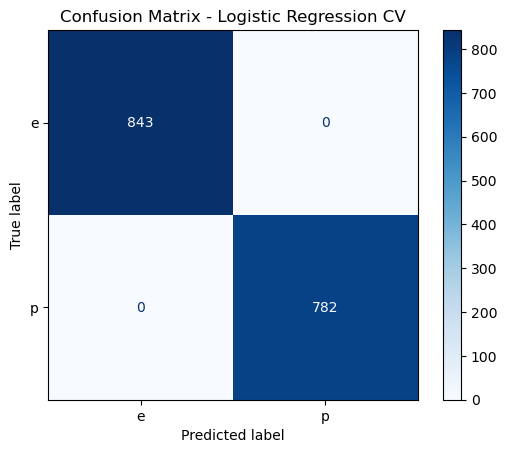

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Best hyperparameters for Logistic Regression CV:
[2.7825594]


In [30]:
# Use LogisticRegressionCV to find best Logistic Regression model
log_reg_cv = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42)
log_reg_cv.fit(X_train, y_train)
y_pred = log_reg_cv.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg_cv.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression CV')
plt.show()
# Classification report
print(classification_report(y_test, y_pred, target_names=log_reg_cv.classes_))

#print the best hyperparameters
print("Best hyperparameters for Logistic Regression CV:")
print(log_reg_cv.C_)

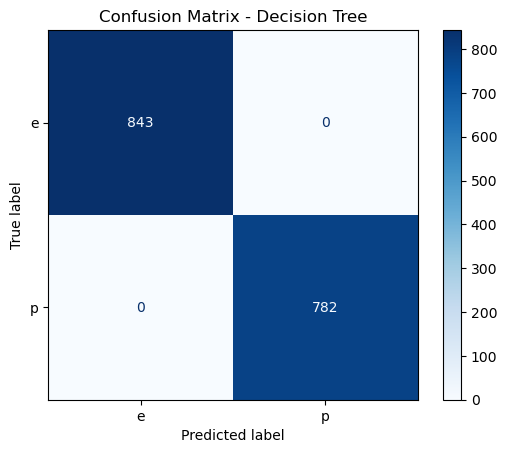

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



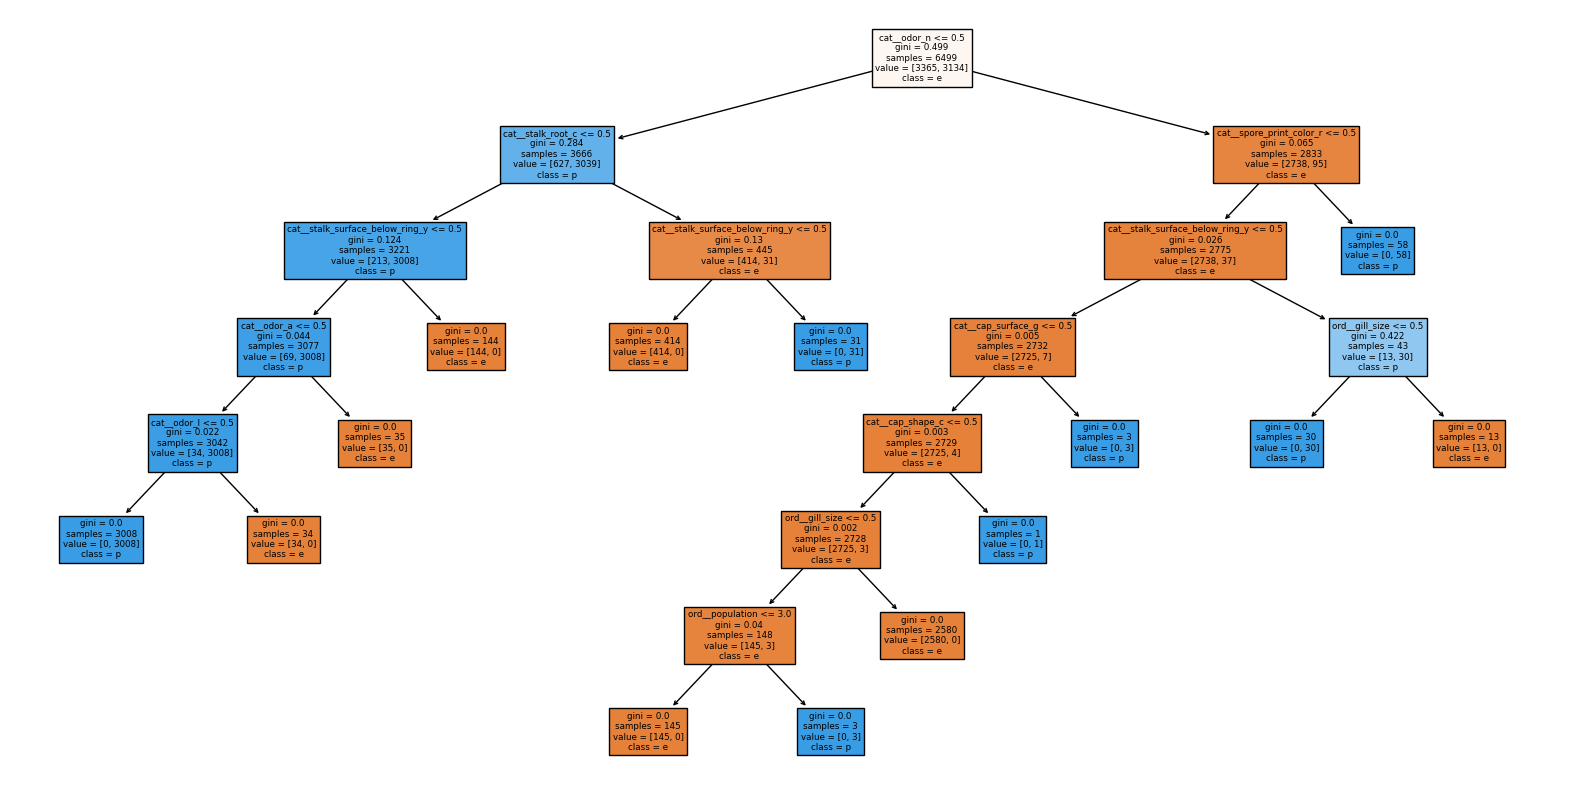

In [33]:
# Using GridSearch for finding the best Decision Tree model
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_tree_model = grid_search.best_estimator_
y_pred_tree = best_tree_model.predict(X_test)

# Plot confusion matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree, labels=best_tree_model.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=best_tree_model.classes_)
disp_tree.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree')
plt.show()
# Classification report for Decision Tree
print(classification_report(y_test, y_pred_tree, target_names=best_tree_model.classes_))

# Plot best Decision Tree
from sklearn import tree
plt.figure(figsize=(20,10))
plt.title("Best Decision Tree")
tree.plot_tree(best_tree_model, filled=True, feature_names=list(col_transformer.get_feature_names_out()), class_names=list(best_tree_model.classes_))
plt.show()



c:\Users\Andry Arthur\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Andry Arthur\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Andry Arthur\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Andry Arthur\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Andr

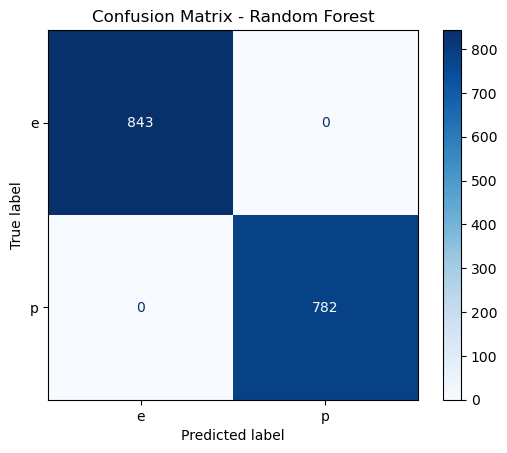

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [35]:
# Use GridSearchCV to find the best Random Forest model
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Plot confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=best_rf_model.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf_model.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Classification report for Random Forest
print(classification_report(y_test, y_pred_rf, target_names=best_rf_model.classes_))


In [36]:
# Assessing the performance of the models
print("Logistic Regression CV Classification Report:")
print(classification_report(y_test, y_pred, target_names=log_reg_cv.classes_))
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree, target_names=best_tree_model.classes_))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=best_rf_model.classes_))

Logistic Regression CV Classification Report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Decision Tree Classification Report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Random Forest Classification Report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro

### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:
- Which model: All the models perform with 100% Accuracy and Precision. So the best model is the one that reaches this result but is the least computationally intensive to train. Thus, logistic regression is the best model.
- Hyper-parameters: C (Regularization strength) = 2.7825594
- Metrics
    - Accuracy: 100
    - Recall: 100
    - Precision: 100
- How did you decide best? I decided by assessing all the perfomance of each model. After concluding that they perform equally well, I just picked the simplest one to train.

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [20]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')
nfl_draft.head()

,Unnamed: 0,round,season,name,age,position,college_conference,height,weight,forty,vertical,broad_jump,cone,shuttle
0,0,1,2003,Dewayne Robertson,21.0,DL,NaN,6.083333,317.0,5.15,NaN,NaN,NaN,NaN
1,1,1,2003,Terence Newman,25.0,DB,Big Twelve Conference,5.833333,189.0,4.37,41.0,136.0,6.88,3.83
2,2,1,2003,Johnathan Sullivan,22.0,DL,NaN,6.250000,313.0,5.10,NaN,NaN,NaN,NaN
3,3,1,2003,Kevin Williams,23.0,DL,NaN,6.416667,304.0,4.81,30.0,112.0,7.66,5.04
4,4,1,2003,Terrell Suggs,20.0,LB,Pacific Ten Conference,6.250000,262.0,4.84,NaN,NaN,NaN,NaN


In [21]:
# Exploring the data
print(nfl_draft.info())
print(nfl_draft.describe())
print(nfl_draft.isnull().sum())
print(nfl_draft.nunique())
print(nfl_draft['round'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2303 non-null   int64  
 1   round               2303 non-null   int64  
 2   season              2303 non-null   int64  
 3   name                2303 non-null   object 
 4   age                 2262 non-null   float64
 5   position            2303 non-null   object 
 6   college_conference  1471 non-null   object 
 7   height              2303 non-null   float64
 8   weight              2303 non-null   float64
 9   forty               2134 non-null   float64
 10  vertical            1832 non-null   float64
 11  broad_jump          1811 non-null   float64
 12  cone                1340 non-null   float64
 13  shuttle             1383 non-null   float64
dtypes: float64(8), int64(3), object(3)
memory usage: 252.0+ KB
None
        Unnamed: 0        round       se

In [22]:
# Define the columns to be encoded
categorical_cols = ['college_conference']

# Create the ColumnTransformer with both encoders
column_transformer = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(sparse=False, drop='first'), ['college_conference']),
        ('ordinal', OrdinalEncoder(), ['position'])
    ],
    remainder='passthrough',  # Keep the rest of the columns unchanged
    verbose_feature_names_out=False  # Disable verbose feature names
)

# Make a copy of the original dataframe to preserve column ordering
nfl_draft_original = nfl_draft.copy()

# Get the original column order excluding the categorical columns
original_cols = [col for col in nfl_draft.columns if col not in categorical_cols]

# Fit and transform the data
encoded_data = column_transformer.fit_transform(nfl_draft)

# Convert the transformed data back to a DataFrame
# Get feature names from the transformer
feature_names = column_transformer.get_feature_names_out()
nfl_draft_encoded = pd.DataFrame(encoded_data, columns=feature_names)

# Now create the target variables
nfl_draft_encoded['draft_day_num'] = nfl_draft_encoded['round'].astype(int).apply(
    lambda x: 1 if x == 1 else (2 if x in [2, 3] else 3)
)

nfl_draft_encoded['draft_day'] = nfl_draft_encoded['round'].astype(int).apply(
    lambda x: 'Day 1' if x == 1 else ('Day 2' if x in [2, 3] else 'Day 3')
)

# This is your transformed dataframe with draft day variables
nfl_draft = nfl_draft_encoded
nfl_draft.head()

c:\Users\Andry Arthur\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,college_conference_Atlantic Coast Conference,college_conference_Atlantic Sun Conference,college_conference_Big East,college_conference_Big Sky Conference,college_conference_Big South Conference,college_conference_Big Ten Conference,college_conference_Big Twelve Conference,college_conference_Central Intercollegiate Athletic Association,college_conference_Colonial Athletic Association,college_conference_Conference USA,...,age,height,weight,forty,vertical,broad_jump,cone,shuttle,draft_day_num,draft_day
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,6.083333,317.0,5.15,NaN,NaN,NaN,NaN,1,Day 1
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,25.0,5.833333,189.0,4.37,41.0,136.0,6.88,3.83,1,Day 1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,6.25,313.0,5.1,NaN,NaN,NaN,NaN,1,Day 1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.0,6.416667,304.0,4.81,30.0,112.0,7.66,5.04,1,Day 1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,6.25,262.0,4.84,NaN,NaN,NaN,NaN,1,Day 1


In [23]:
# Feature and target preparation
# Drop unnecessary columns and the target variable from features
X = nfl_draft.drop(['round', 'draft_day_num', 'draft_day', 'name', 'season', 'Unnamed: 0', 'college'], axis=1, errors='ignore')
y = nfl_draft['draft_day_num']

X

,college_conference_Atlantic Coast Conference,college_conference_Atlantic Sun Conference,college_conference_Big East,college_conference_Big Sky Conference,college_conference_Big South Conference,college_conference_Big Ten Conference,college_conference_Big Twelve Conference,college_conference_Central Intercollegiate Athletic Association,college_conference_Colonial Athletic Association,college_conference_Conference USA,...,college_conference_nan,position,age,height,weight,forty,vertical,broad_jump,cone,shuttle
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,21.0,6.083333,317.0,5.15,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,25.0,5.833333,189.0,4.37,41.0,136.0,6.88,3.83
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,22.0,6.25,313.0,5.1,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,23.0,6.416667,304.0,4.81,30.0,112.0,7.66,5.04
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,20.0,6.25,262.0,4.84,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,23.0,6.166667,286.0,5.06,29.5,103.0,NaN,NaN
2299,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,23.0,6.0,229.0,NaN,NaN,NaN,NaN,NaN
2300,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,22.0,6.333333,250.0,NaN,37.0,118.0,NaN,NaN
2301,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,21.0,5.916667,191.0,4.61,37.0,122.0,NaN,4.16


Number of NaN values in X_train: 2423
Columns with NaNs:
['age', 'forty', 'vertical', 'broad_jump', 'cone', 'shuttle']
NaNs after imputation: 0
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


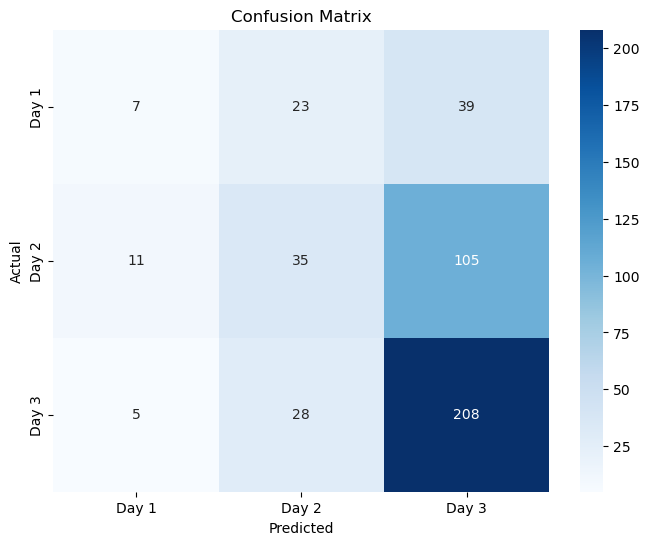

Model Accuracy: 0.5423

Classification Report:
              precision    recall  f1-score   support

       Day 1       0.30      0.10      0.15        69
       Day 2       0.41      0.23      0.30       151
       Day 3       0.59      0.86      0.70       241

    accuracy                           0.54       461
   macro avg       0.43      0.40      0.38       461
weighted avg       0.49      0.54      0.49       461



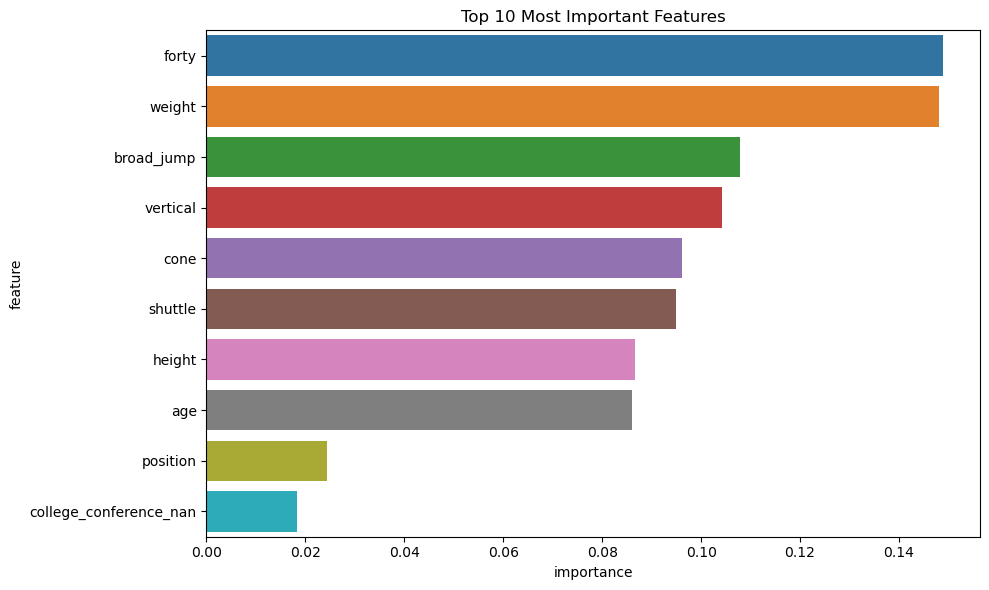

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# First, check for NaN values
print(f"Number of NaN values in X_train: {X_train.isna().sum().sum()}")
print(f"Columns with NaNs:")
print(X_train.columns[X_train.isna().any()].tolist())

# Create imputer for numeric columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(exclude=['float64', 'int64']).columns

# Impute missing values
if len(numeric_cols) > 0:
    numeric_imputer = SimpleImputer(strategy='median')
    X_train[numeric_cols] = numeric_imputer.fit_transform(X_train[numeric_cols])
    X_test[numeric_cols] = numeric_imputer.transform(X_test[numeric_cols])
    
if len(categorical_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])
    X_test[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])

# Verify all NaNs are gone
print(f"NaNs after imputation: {X_train.isna().sum().sum()}")

# Scale numeric features
if len(numeric_cols) > 0:  
    scaler = StandardScaler()
    X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
    X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Train RandomForest model with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Print best parameters
print("Best parameters:", grid_search.best_params_)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate with confusion matrix
day_labels = {1: 'Day 1', 2: 'Day 2', 3: 'Day 3'}
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[day_labels[i] for i in range(1, 4)],
            yticklabels=[day_labels[i] for i in range(1, 4)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Get accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Get classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[day_labels[i] for i in range(1, 4)]))

# Show feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?
 - What was your accuracy?

I used a Random Forest model for this task because it is a robust ensemble learning method that combines multiple decision trees to improve predictive performance and reduce overfitting. Random Forests are particularly effective for handling datasets with a mix of categorical and numerical features, as well as missing values, which were present in this dataset. Additionally, the ability to tune hyperparameters such as the number of estimators, maximum depth, and minimum samples split allowed me to optimize the model for better accuracy.

The accuracy of my model was 54.23%, which indicates that the model correctly predicted the draft day for approximately half of the players in the test set. While this accuracy is moderate, it reflects the complexity of the task and the variability in the dataset. Further improvements could be made by exploring additional feature engineering, handling missing values more effectively, or trying other advanced models.
